In [1]:
#Importamos os pacotes
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv("../bases/diabetes.csv")
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
#Reparametrizar a resposta de 1 a 'Diab' e 0 a 'Non-Diab'
df.Outcome = df.Outcome.replace({0:'Non-Diab',1:'Diab'})
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age   Outcome  
0                     0.627   50      Diab  
1                     0.351   31  Non-Diab  
2                     0.672   32      Diab  
3                     0.167   21  Non-Diab  
4                     2.288   33      Diab

In [4]:
#Renomear a coluna DiabetesPedigreeFunction a DPF
df.DiabetesPedigreeFunction = df.rename({'DiabetesPedigreeFunction':'DPF'},inplace = True,axis =1)
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI    DPF  \
0            6      148             72             35        0  33.6  0.627   
1            1       85             66             29        0  26.6  0.351   
2            8      183             64              0        0  23.3  0.672   
3            1       89             66             23       94  28.1  0.167   
4            0      137             40             35      168  43.1  2.288   

   Age   Outcome  
0   50      Diab  
1   31  Non-Diab  
2   32      Diab  
3   21  Non-Diab  
4   33      Diab

In [5]:
#Verificamos los tipos de datos
df.dtypes

Pregnancies        int64
Glucose            int64
BloodPressure      int64
SkinThickness      int64
Insulin            int64
BMI              float64
DPF              float64
Age                int64
Outcome           object
dtype: object

In [6]:
#Converta para a variável: DPF em Integer e verifique sua conversão correta
#df["DPF"] = pd.to_numeric(df["DPF"])
#Validação de alteração de dados
#df.dtypes

In [7]:
#Shape
df.shape

(768, 9)

In [8]:
#Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   DPF            768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [9]:
#Estatísticas básicas
df.describe().T

count        mean         std     min       25%       50%  \
Pregnancies    768.0    3.845052    3.369578   0.000   1.00000    3.0000   
Glucose        768.0  120.894531   31.972618   0.000  99.00000  117.0000   
BloodPressure  768.0   69.105469   19.355807   0.000  62.00000   72.0000   
SkinThickness  768.0   20.536458   15.952218   0.000   0.00000   23.0000   
Insulin        768.0   79.799479  115.244002   0.000   0.00000   30.5000   
BMI            768.0   31.992578    7.884160   0.000  27.30000   32.0000   
DPF            768.0    0.471876    0.331329   0.078   0.24375    0.3725   
Age            768.0   33.240885   11.760232  21.000  24.00000   29.0000   

                     75%     max  
Pregnancies      6.00000   17.00  
Glucose        140.25000  199.00  
BloodPressure   80.00000  122.00  
SkinThickness   32.00000   99.00  
Insulin        127.25000  846.00  
BMI             36.60000   67.10  
DPF              0.62625    2.42  
Age             41.00000   81.00

<Figure size 768x576 with 0 Axes>

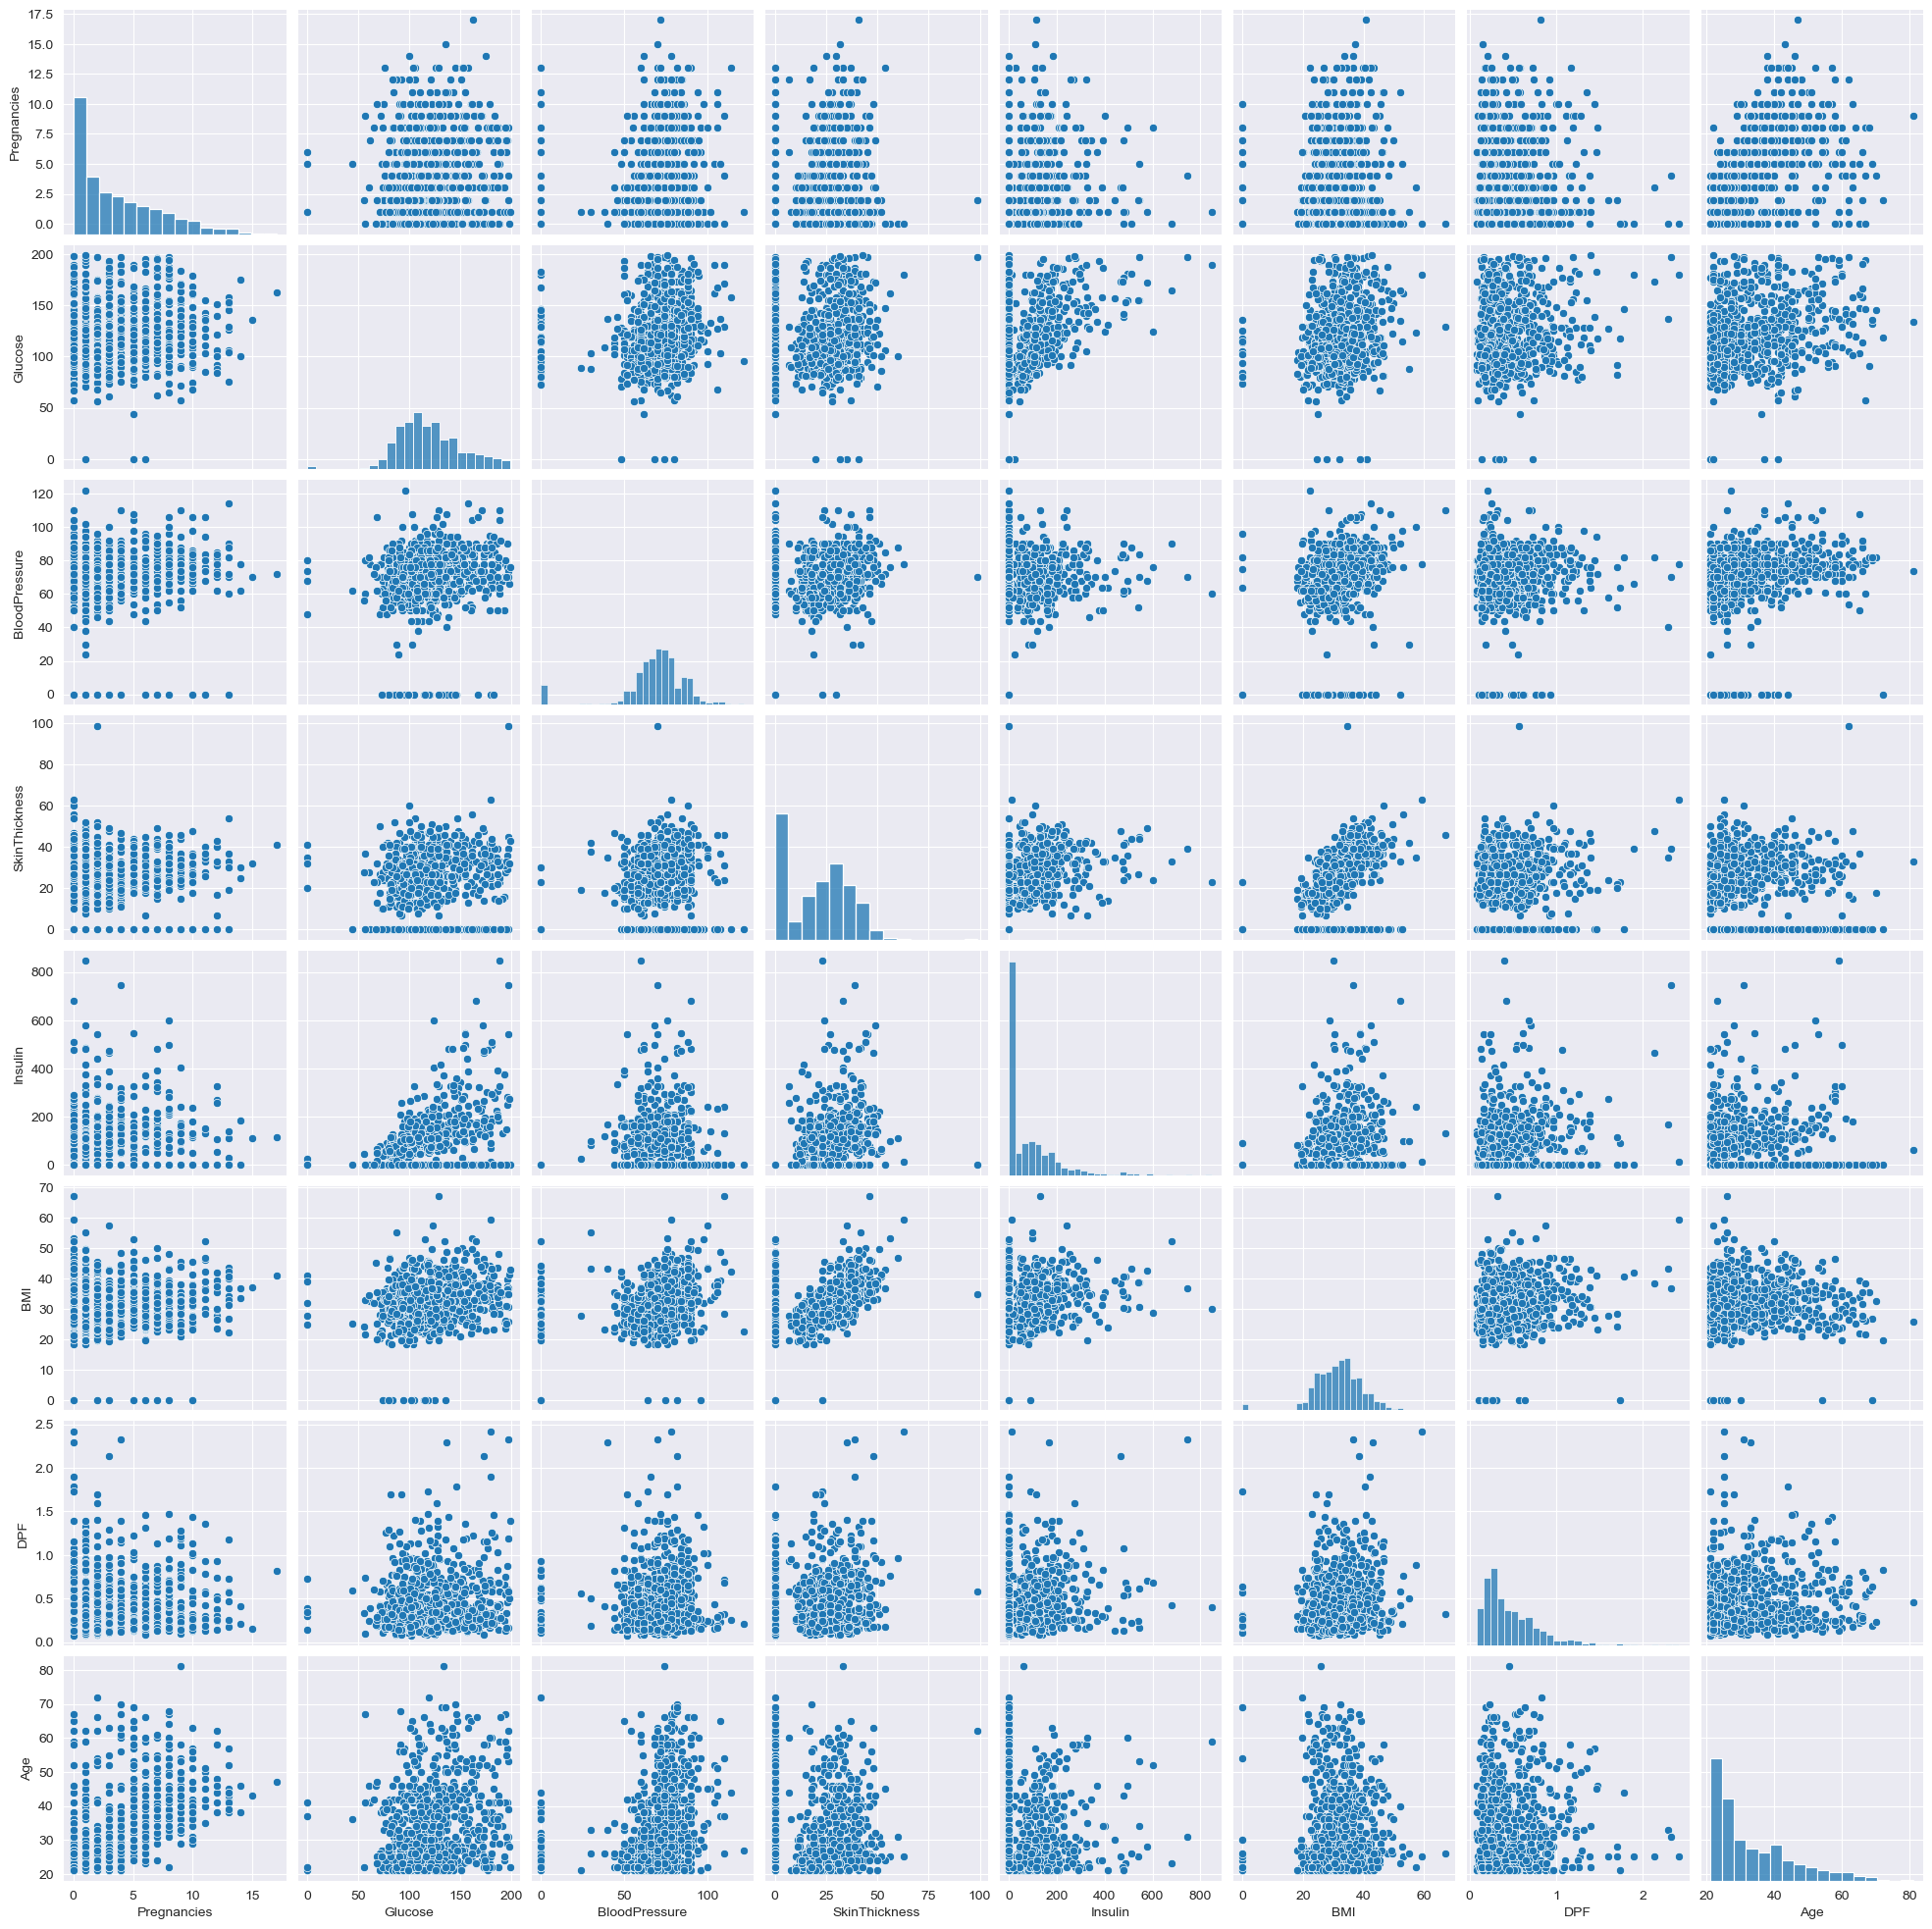

In [10]:
#Criar um Pairplot do dataset
plt.figure(dpi=120)
sns.pairplot(df)
plt.show()

<Figure size 768x576 with 0 Axes>

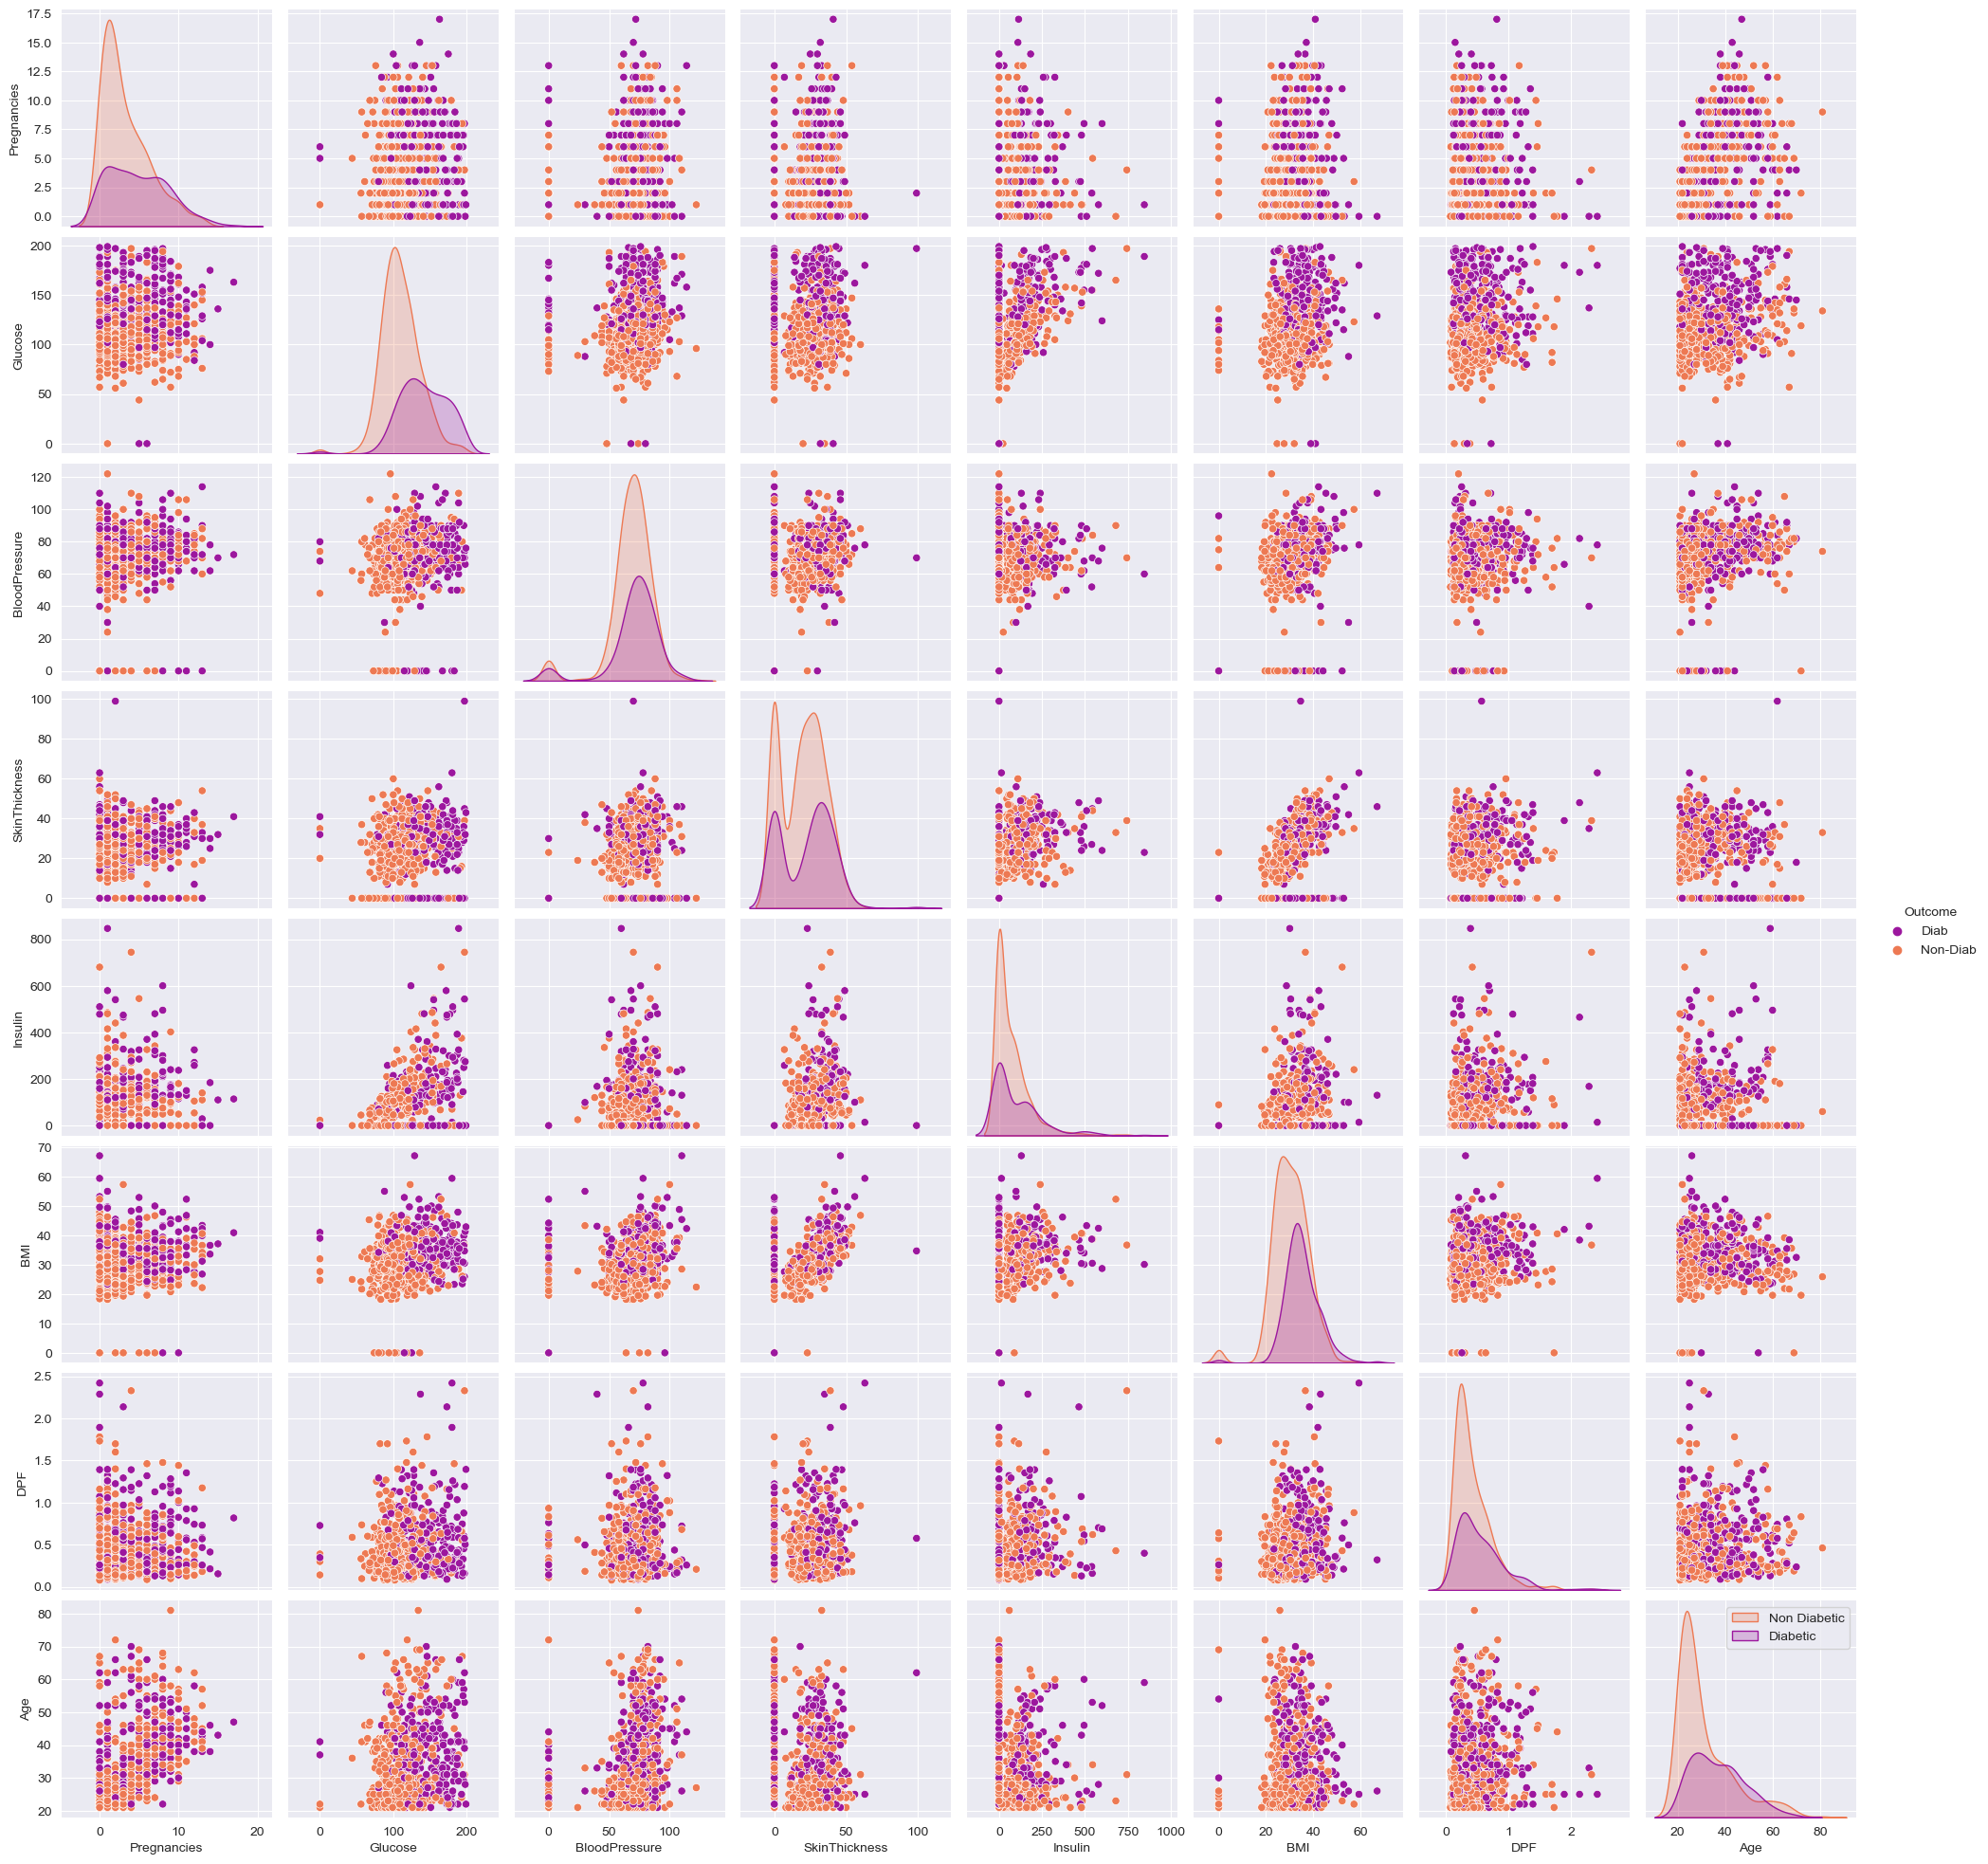

In [11]:
#Criar um Pairplot do dataset segundo a resposta
plt.figure(dpi = 120)
sns.pairplot(df,hue = 'Outcome',palette = 'plasma')
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

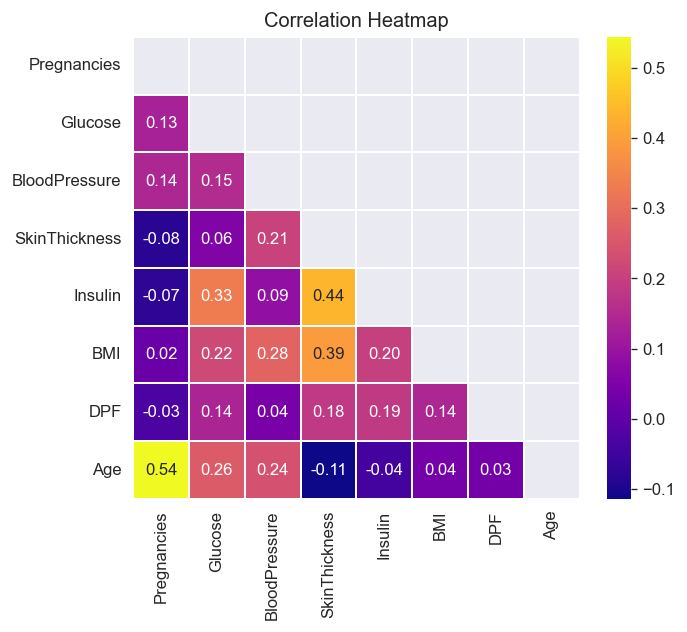

In [12]:
#Correlações
plt.figure(dpi = 120,figsize= (6,5))
mask = np.triu(np.ones_like(df.corr(),dtype = bool))
sns.heatmap(df.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma')
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

Joint plot de Glucosa con otras variables ==> 

Correlacion entre Glucose y Pregnancies ==>  0.12945867149927248


<Figure size 500x400 with 0 Axes>

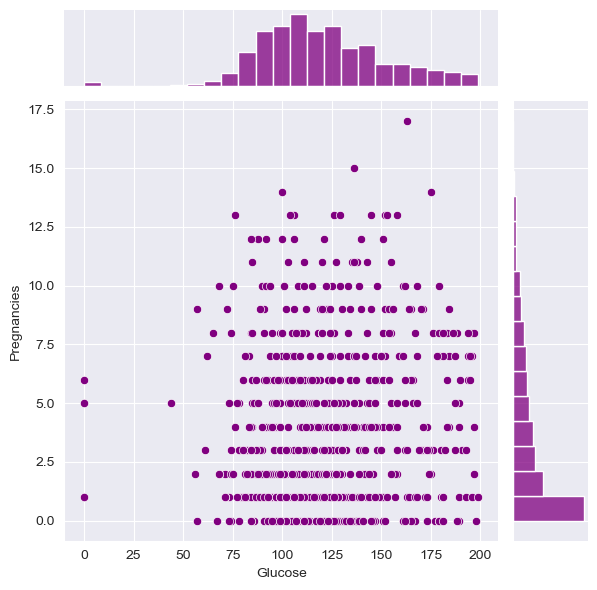

Correlacion entre Glucose y BloodPressure ==>  0.1525895865686646


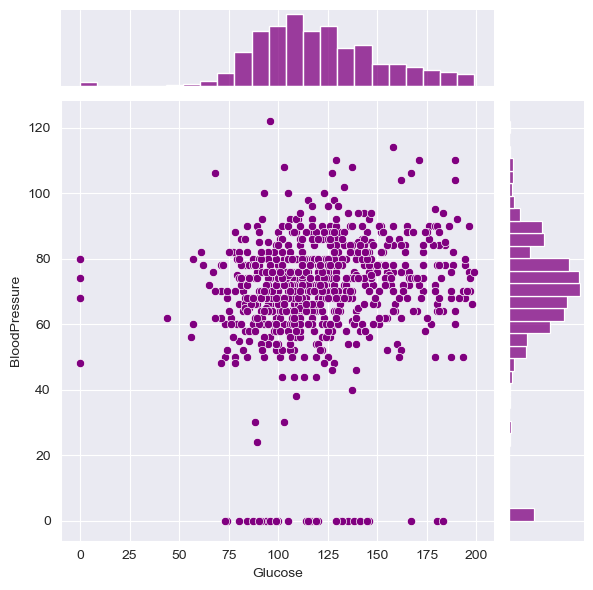

Correlacion entre Glucose y SkinThickness ==>  0.05732789073817692


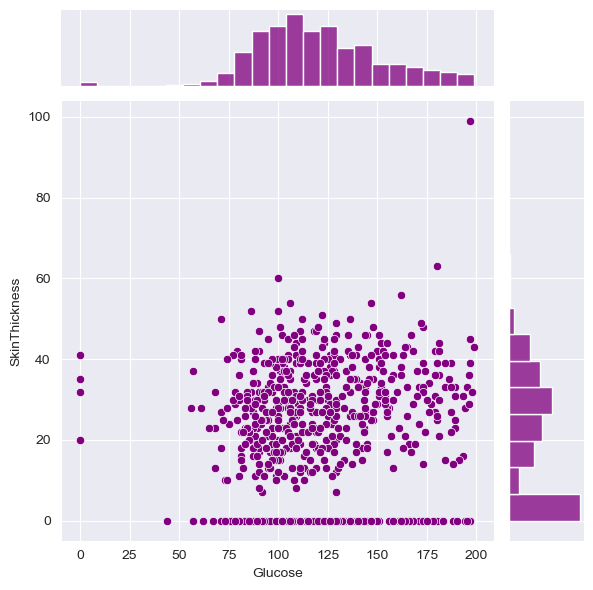

Correlacion entre Glucose y Insulin ==>  0.3313571099202092


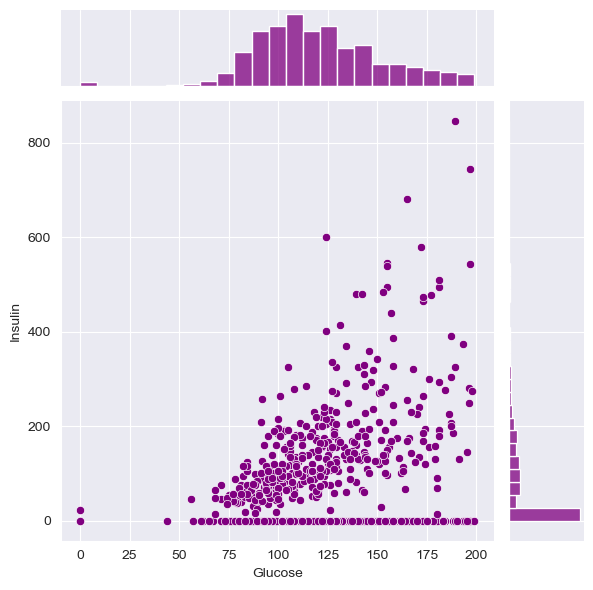

Correlacion entre Glucose y BMI ==>  0.2210710694589828


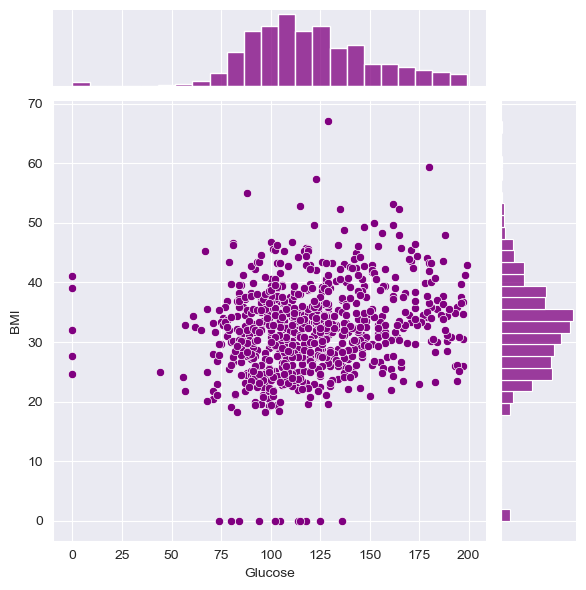

Correlacion entre Glucose y DPF ==>  0.13733729982837092


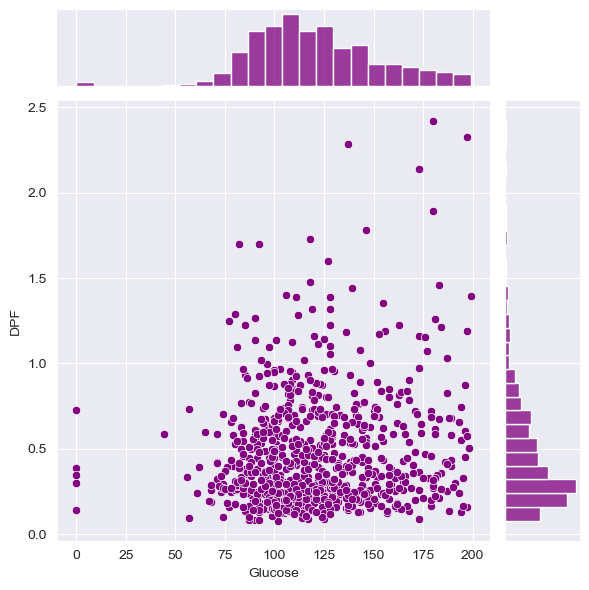

Correlacion entre Glucose y Age ==>  0.26351431982433343


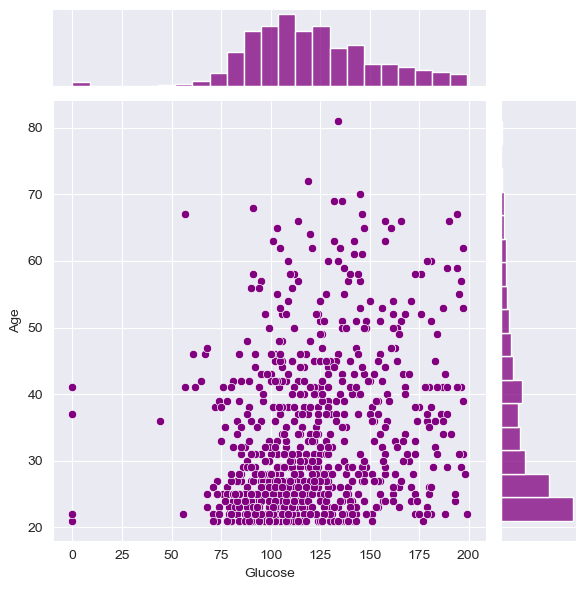

In [13]:
#JoinPlot
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de Glucosa con otras variables ==> \n")
for i in  df.columns:
    if i != 'Glucose' and i != 'Outcome':
        print(f"Correlacion entre Glucose y {i} ==> ",df.corr().loc['Glucose'][i])
        sns.jointplot(x='Glucose',y=i,data=df,kind = 'scatter',color = 'purple')
        plt.show()

**Insight**: A glicose mostra uma associação linear positiva fraca com as outras variáveis ​​no conjunto de dados. Isso significa que ao aumentar o nível de glicose nos pacientes, as outras variáveis ​​também aumentarão.

Joint plot ==> 

Correlação entre BloodPressure e {col[i]} ==>  0.2073705384030709


<Figure size 500x400 with 0 Axes>

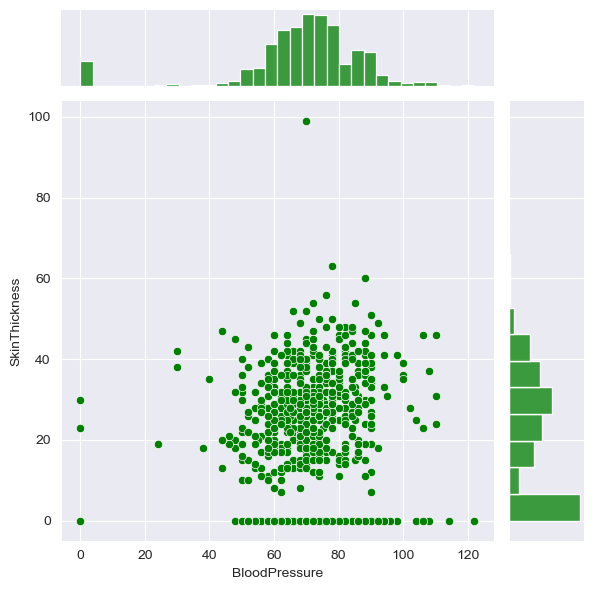

Correlação entre BloodPressure e {col[i]} ==>  0.08893337837319314


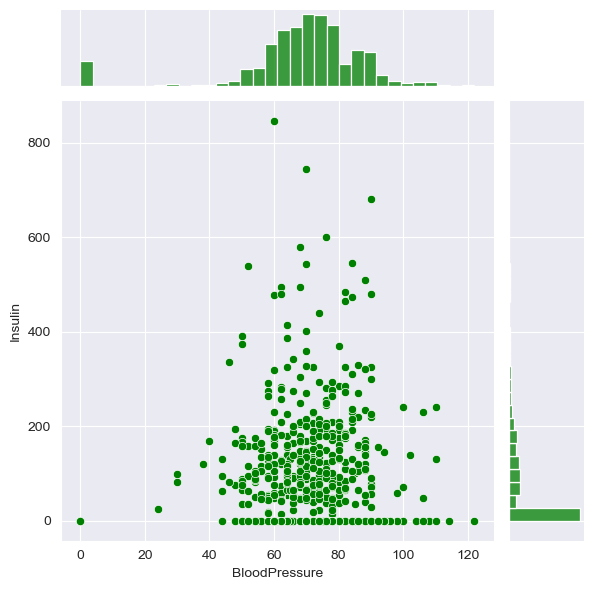

Correlação entre BloodPressure e {col[i]} ==>  0.2818052888499109


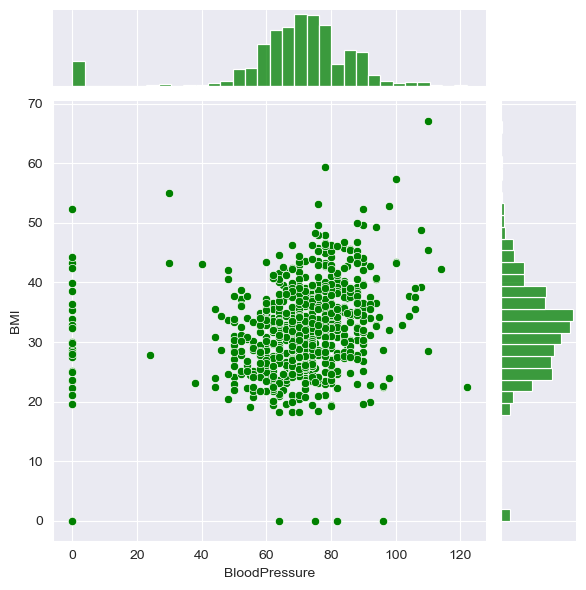

Correlação entre BloodPressure e {col[i]} ==>  0.04126494793009856


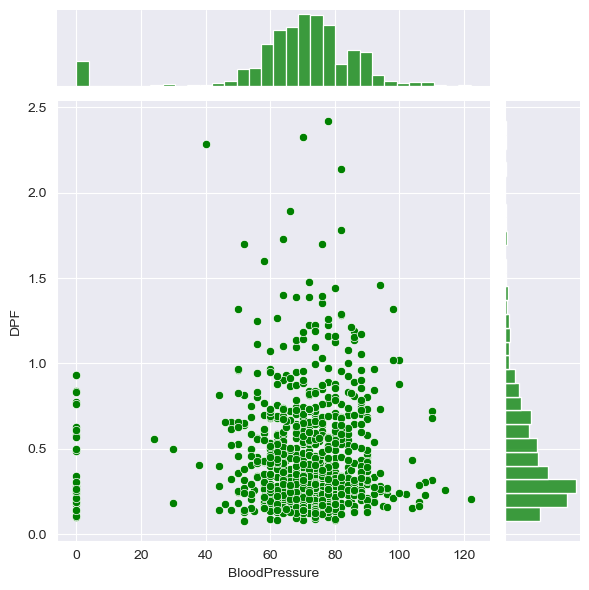

Correlação entre BloodPressure e {col[i]} ==>  0.23952794642136344


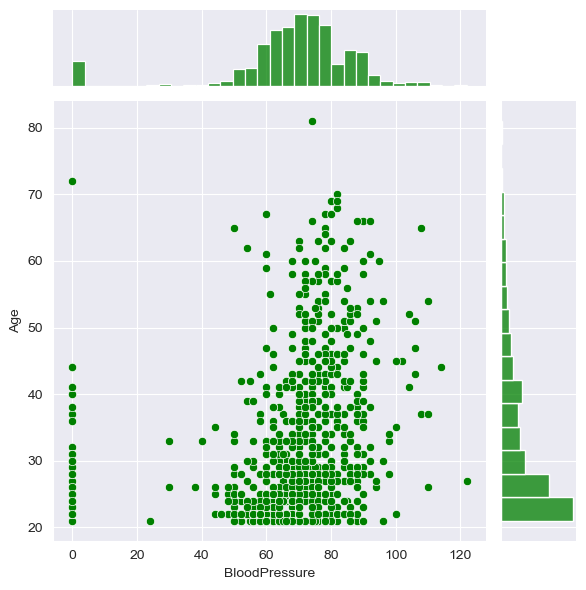

In [14]:
#Join plot entre BloodPressure e os resto das features

col = list(df.columns)
idx = col.index('BloodPressure')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot ==> \n")
for i in  range(idx+1,len(col)-1):
    print("Correlação entre BloodPressure e {col[i]} ==> ",df.corr().loc['BloodPressure'][col[i]])
    sns.jointplot(x='BloodPressure',y=col[i],data=df,kind = 'scatter',color = 'green')
    plt.show()

**Insight**: BloodPressure mostra uma associação linear positiva fraca com as outras variáveis ​​no conjunto de dados fornecido. Isso significa que ao aumentar o nível de PA nos pacientes, o restante das variáveis ​​também aumentará.

Joint plot de SkinThickness con otras variables ==> 

Correlacion entre SkinThickness y Insulin ==>  0.43678257012001326


<Figure size 500x400 with 0 Axes>

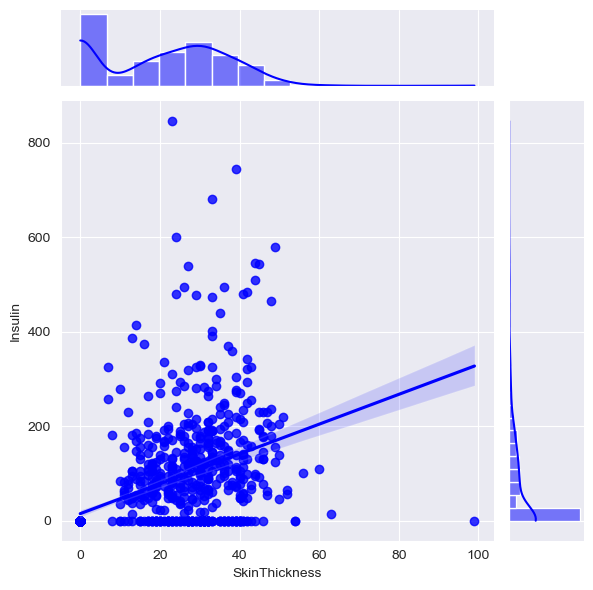

Correlacion entre SkinThickness y BMI ==>  0.39257320415903835


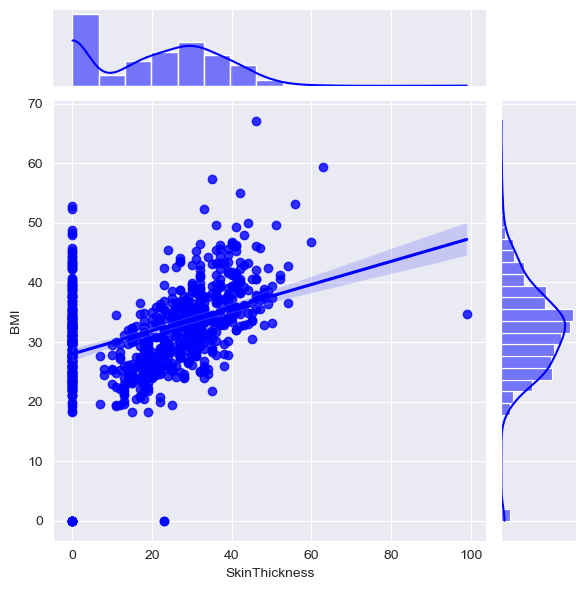

Correlacion entre SkinThickness y DPF ==>  0.1839275729541631


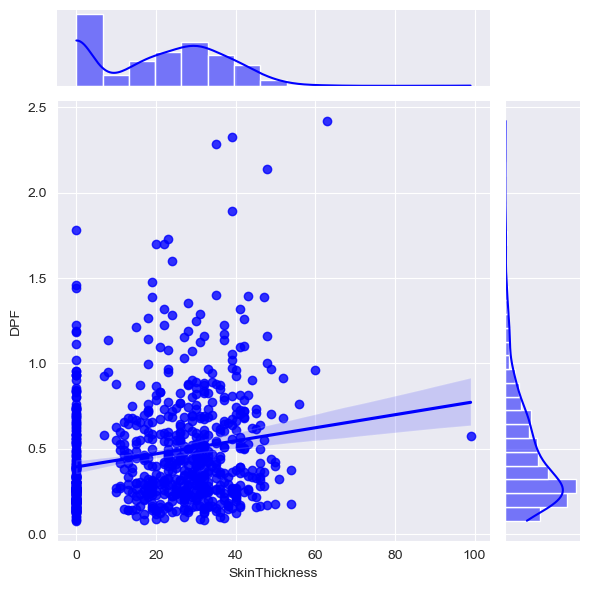

Correlacion entre SkinThickness y Age ==>  -0.11397026236774152


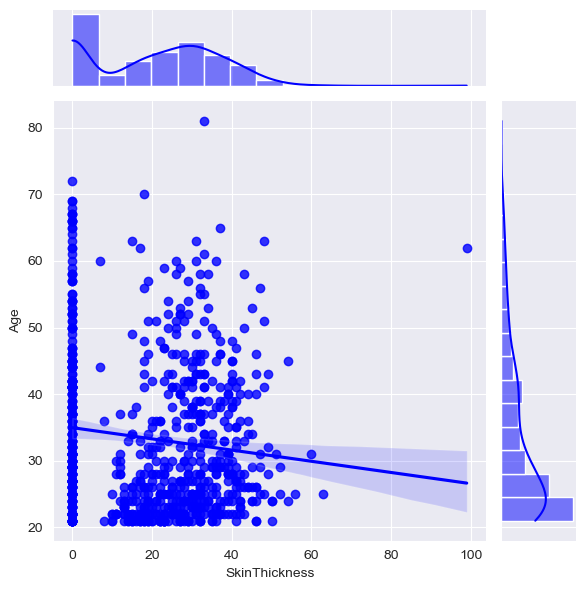

In [15]:
#Crie o gráfico de junção entre SkinThickness e o restante das variáveis ​​com sua interpretação correspondente.

col = list(df.columns)
idx = col.index('SkinThickness')

plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot de SkinThickness con otras variables ==> \n")
for i in  range(idx+1,len(col)-1):
    print(f"Correlacion entre SkinThickness y {col[i]} ==> ",df.corr().loc['SkinThickness'][col[i]])
    sns.jointplot(x='SkinThickness',y=col[i],data=df,kind = 'reg',color = 'blue')
    plt.show()

**Insight**: SkinThickness mostra uma associação linear positiva fraca com o resto das variáveis, exceto para a idade. Isso significa que à medida que a SkinThickness aumenta nos pacientes, as outras variáveis ​​também aumentarão. A espessura da pele com a idade apresenta uma correlação negativa fraca, ou seja, à medida que a espessura da pele aumenta, a idade diminui.